## Bootstrapping 방법을 이용해 K-Nearest Neighbor에서 최적의 K값 찾기

In [17]:
set.seed(1200)
data <- rnorm(100,5,3)
B <- 1000
b.samples <- lapply(1:B, function(i) sample(data, replace = T))
b.median <- sapply(b.samples, median)
sqrt(var(b.median))

[1] 0.3696774

-------
### 이론적으로
$$ Var (중앙값) = \frac{p\times(1-p)}{n \times f(5)^2} =  \frac{1}{100 \times 4 \times f(5)^2} = 0.1414 , \quad f(5) = dnorm(0,0,3)$$

$$ \sqrt{0.1414} = 0.376 $$

In [1]:
head(iris)
install.packages("class")
any(grepl("class", installed.packages())) ## package checking

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


[1] TRUE

In [2]:
library("class")

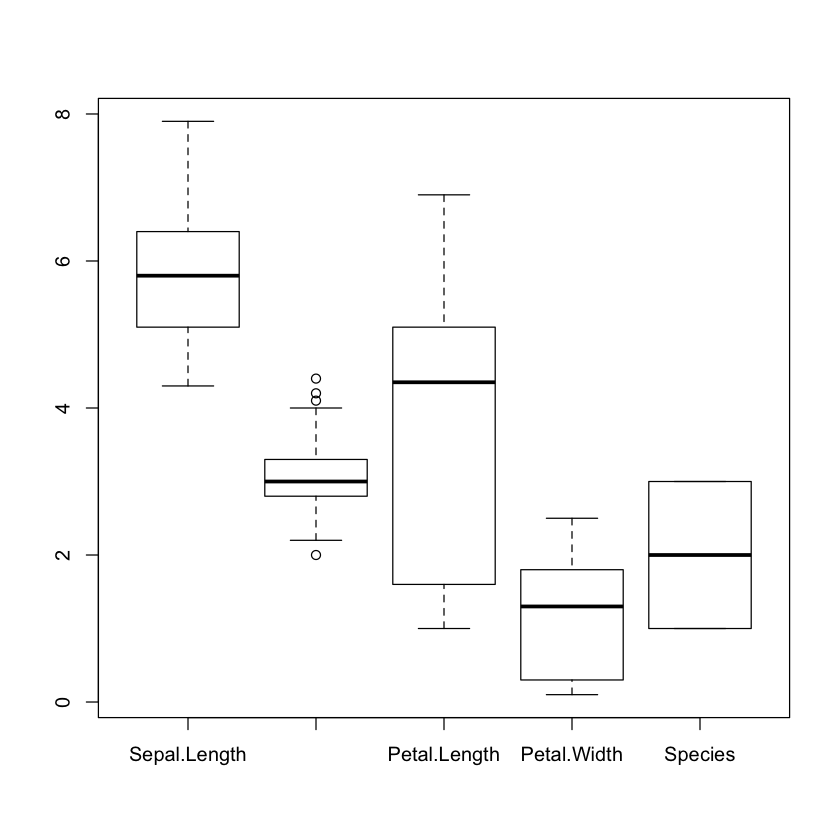

In [3]:
boxplot(iris)

In [4]:
iris
set.seed(1234)

ind <- sample(1:nrow(iris), nrow(iris), replace=TRUE)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


In [5]:
dim(iris)

[1] 150   5

In [6]:
iris.training <- iris[ifelse(ind%%3!=0,ind,0), 1:4]
iris.test <- iris[ifelse(ind%%3==0,ind,0), 1:4]
dim(iris.training)
dim(iris.test)
iris.test[1,]


[1] 106   4

[1] 44  4

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
18,5.1,3.5,1.4,0.3


In [7]:
iris.trainLabels <- iris[ifelse(ind%%3!=0,ind,0), 5]
iris.testLabels <- iris[ifelse(ind%%3==0,ind,0), 5]

In [8]:
iris.trainLabels

[1] versicolor versicolor versicolor virginica  versicolor setosa    
  [7] setosa     versicolor versicolor setosa     virginica  setosa    
 [13] setosa     setosa     setosa     setosa     setosa     virginica 
 [19] versicolor virginica  setosa     setosa     setosa     versicolor
 [25] setosa     setosa     virginica  virginica  versicolor setosa    
 [31] versicolor setosa     versicolor versicolor setosa     virginica 
 [37] setosa     versicolor setosa     versicolor virginica  virginica 
 [43] virginica  setosa     virginica  setosa     versicolor setosa    
 [49] versicolor setosa     virginica  virginica  setosa     versicolor
 [55] setosa     setosa     virginica  virginica  versicolor setosa    
 [61] versicolor versicolor setosa     setosa     setosa     virginica 
 [67] setosa     setosa     versicolor setosa     setosa     setosa    
 [73] virginica  versicolor setosa     setosa     setosa     setosa    
 [79] virginica  setosa     virginica  setosa     virginica  virginica 
 [85] setosa     virginica  virginica  versicolor setosa     setosa    
 [91] versicolor virginica  setosa     versicolor versicolor virginica 
 [97] versicolor virginica  versicolor virginica  setosa     versicolor
[103] versicolor virginica  versicolor virginica 
Levels: setosa versicolor virginica

In [9]:
############# 패키지 없이 ##################
# 
guess.knn <- function(x, train, trainlabels, k){
  xmatrix <- matrix(as.numeric(x), nrow=nrow(train), ncol=length(x), byrow=T)
  xmatrix <- (as.matrix(train)-xmatrix)^2
  diffs <- sqrt(rowSums(xmatrix))
  diffs <- data.frame(dist=diffs,label=trainlabels)
  diffs <- (diffs[order(diffs$dist),])
  diffs <- diffs[1:k,]
  guess <- names(sort(-table(diffs$label)))[1]
  return(guess)
}


In [10]:
xmatrix <- matrix(as.numeric(iris.test[1,]), nrow=nrow(iris.training), ncol=length(iris.test[1,]), byrow=T)
xmatrix <- (as.matrix(iris.training)-xmatrix)^2
diffs <- sqrt(rowSums(xmatrix))
diffs <- data.frame(dist=diffs,label=iris.trainLabels)
diffs <- (diffs[order(diffs$dist),])
diffs <- diffs[1:3,]
guess <- names(sort(-table(diffs$label)))[1]
guess

[1] "setosa"

In [11]:
result <- apply(iris.test, 1, function(x) guess.knn(x, iris.training, iris.trainLabels, k = 10))
result

18           78          105          126           48           24 
    "setosa"  "virginica"  "virginica"  "virginica"     "setosa"     "setosa" 
           6           33          138           69          114           39 
    "setosa"     "setosa"  "virginica" "versicolor"  "virginica"     "setosa" 
          84          102           12          108           75           27 
 "virginica"  "virginica"     "setosa"  "virginica" "versicolor"     "setosa" 
        48.1            3           36          3.1         78.1           30 
    "setosa"     "setosa"     "setosa"     "setosa"  "virginica"     "setosa" 
         135        135.1           21          6.1         21.1         24.1 
 "virginica"  "virginica"     "setosa"     "setosa"     "setosa"     "setosa" 
          66          6.2         33.1           42          120        138.1 
"versicolor"     "setosa"     "setosa"     "setosa" "versicolor"  "virginica" 
         150         75.1         48.2           96        138.2           90 
 "virginica" "versicolor"     "setosa" "versicolor"  "virginica" "versicolor" 
          54           87 
"versicolor" "versicolor"

In [12]:
mean(result != iris.testLabels)

[1] 0.09090909

In [13]:
iris_pred <- knn(train = iris.training, test = iris.test, cl = iris.trainLabels, k=10)
summary(iris_pred)

setosa versicolor  virginica 
        21          8         15

In [14]:
check <- data.frame(pred1 = iris_pred, pred2 = result, real = iris.testLabels)
check
mean(check[,1] == check[,3])
sum(check[,1] != check[,2])

,pred1,pred2,real
18,setosa,setosa,setosa
78,virginica,virginica,versicolor
105,virginica,virginica,virginica
126,virginica,virginica,virginica
48,setosa,setosa,setosa
24,setosa,setosa,setosa
6,setosa,setosa,setosa
33,setosa,setosa,setosa
138,virginica,virginica,virginica
69,versicolor,versicolor,versicolor


[1] 0.9318182

[1] 1

In [15]:
ptm <- proc.time()
set.seed(103)
B <- 1000
mat <- matrix(c(rep(0,80)),40,2)
n.set <- lapply(1:B,function(i) sample(1:nrow(iris),nrow(iris),replace=T))
for(z in 1:40){
  d.tr.r <- 0
  d.tr2 <- 0
  boot.data <- function(x){
    d.tr <- iris[ifelse(x%%5 !=0,x,0),1:4]
    d.te <- iris[ifelse(x%%5 ==0,x,0),1:4]
    d.tr.l <- iris[ifelse(x%%5 !=0,x,0),5]
    d.te.l <- iris[ifelse(x%%5 ==0,x,0),5]
    pred <- knn(train = d.tr, test = d.te, cl = d.tr.l, k=z)
    two <- data.frame(pred = pred, real = d.te.l)
    fittness <- mean(two[,1] == two[,2])
    return(fittness)
  }
  d.tr2 <- sapply(n.set,boot.data)
  d.tr.r <- c(mean(d.tr2),var(d.tr2))
  mat[z,] <- d.tr.r
}
mat
proc.time() - ptm

0.9571409,0.0019506687
0.9575875,0.0019748384
0.9637659,0.0019554176
0.9688493,0.0017268782
0.9735812,0.0015543586
0.9782010,0.0013347126
0.9818452,0.0011848915
0.9841682,0.0010101404
0.9865034,0.0008891406
0.9869270,0.0007949903
0.9878941,0.0007409154


   user  system elapsed 
 92.083   1.420  95.779 

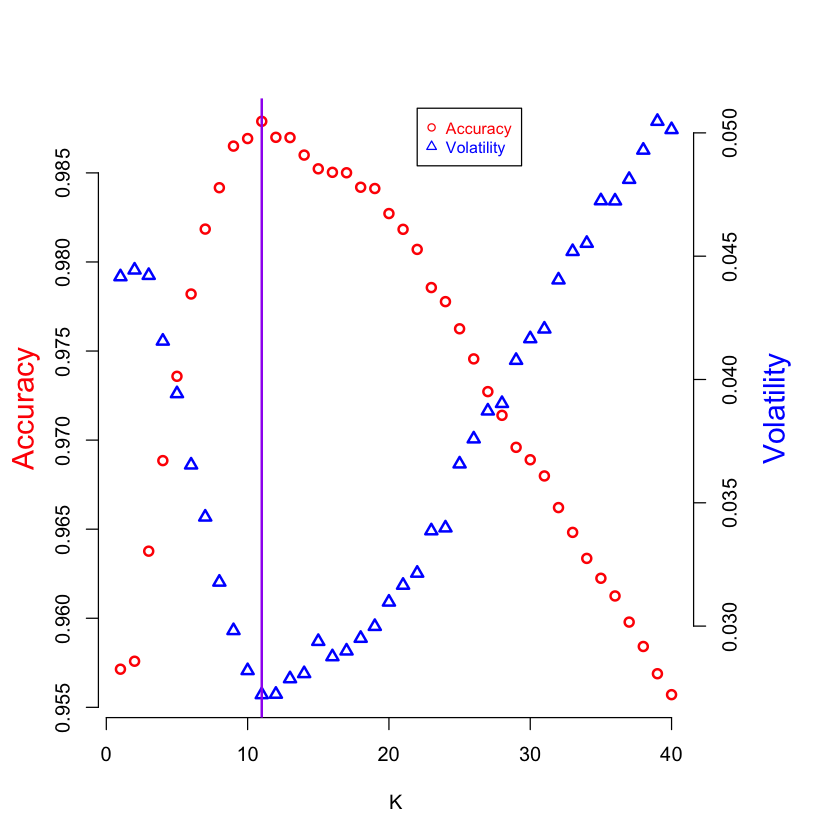

In [16]:
par(mar = c(5, 4, 4, 6) + 0.1)
plot(mat[,1], col = "red", xlab = "K", ylab = "", axes = FALSE, lwd = 2)
axis(side = 2,)
mtext("Accuracy", side = 2, line = 2.5, col = "red", cex = 1.5)
par(new=T)
plot(sqrt(mat[,2]), col = "blue", xlab = "", ylab = "", axes = FALSE, pch = 2, lwd = 2)
axis(side = 4)
axis(side = 1)
mtext("Volatility", side = 4, col = "blue", line = 3, cex = 1.5)
legend(22,0.051, legend = c("Accuracy", "Volatility"), cex = 0.8, text.col = c("red", "blue"), pch = c(1,2),  col = c("red", "blue"))
abline(v = 11, col = "purple", lwd = 2)